In [2]:
import pandas as pd
voltage = pd.read_csv('./Vtdata.txt', header=None).transpose().rename(columns={0:'Voltage', 1:'Error'})

In [3]:
voltage = voltage.assign(diode=(voltage.index+1))

In [4]:
wavelength = pd.read_csv('./InWdata.txt', header=None).transpose().rename(columns={0:'Wavelength', 1:'Error'})

In [5]:
wavelength = wavelength.assign(diode=(wavelength.index+1))

In [6]:
wavelength

Wavelength  Error  diode
0        2.14   0.04      1
1        1.67   0.02      2
2        2.47   0.03      3
3        1.58   0.02      4
4        1.64   0.01      5
5        1.77   0.03      6

In [7]:
df = voltage.merge(wavelength, on='diode')

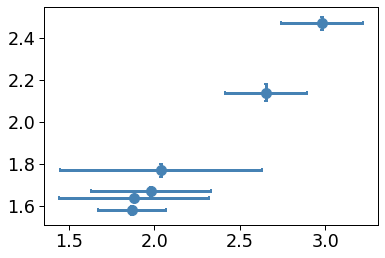

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper', font_scale=2)
plt.errorbar(df.Voltage, df.Wavelength, xerr=df.Error_x, yerr=df.Error_y, linestyle = 'None', fmt='-o',
             capsize=2, elinewidth=3, capthick=2, markersize=10, color='steelblue', label="Experimental data")
plt.title('')
plt.show()

-0.17287330611336074+-0.09373691329082753
0.07823577109862284


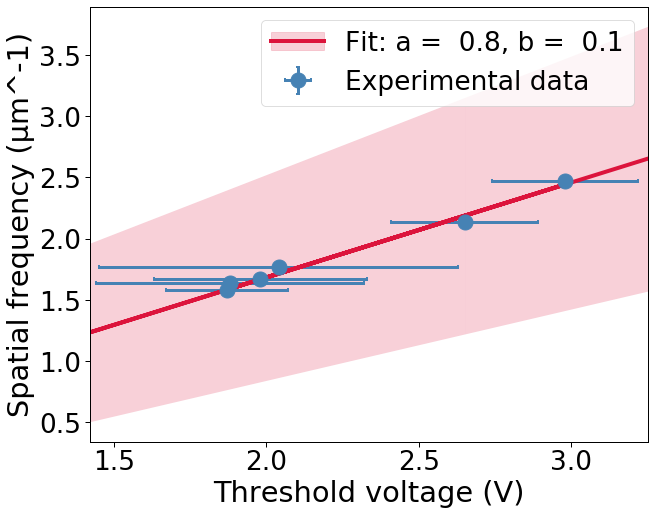

In [10]:
import numpy as np
from scipy.optimize import curve_fit
from scipy import odr
import seaborn as sns
sns.set_context('paper', font_scale=3)
def func(p, x):
    a, b = p
    return a*x+b
quad_model = odr.Model(func)
data = odr.RealData(df.Voltage.values, df.Wavelength.values, sx=df.Error_x, sy=df.Error_y)
odr = odr.ODR(data, quad_model, beta0=[1., 1.])
out = odr.run()

#print fit parameters and 1-sigma estimates
popt = out.beta
plt.figure(figsize=(10,8))
error = np.sqrt(np.diag(out.cov_beta))
a_dev, b_dev = out.sd_beta
x_intercept = -1*popt[1]/popt[0]
x_err = (((((-1)*popt[1])+b_dev)/(popt[0]-a_dev))-((((-1)*popt[1])-b_dev)/(popt[0]+a_dev)))/2
print(str(x_intercept)+'+-'+str(x_err))
print(b_dev)
p3 = plt.errorbar(df.Voltage, df.Wavelength, xerr=df.Error_x, yerr=df.Error_y, linestyle = 'None', fmt='-o',
             capsize=2, elinewidth=3, capthick=2, markersize=15, color='steelblue', label="Experimental data")
p1 = plt.plot(np.append(df.Voltage.values, [1.42,3.25]), func(popt, np.append(df.Voltage.values, [1.42,3.25])),color='crimson',
             label='fit: a=%5.1f, b=%5.1f' % tuple(popt), lw=4)
p2 = plt.fill(np.NaN, np.NaN, color='crimson', alpha = 0.2)
plt.fill_between(np.append(df.Voltage.values, [1.42, 3.25]), 
                 func(popt - error, np.append(df.Voltage.values, [1.42, 3.25])),
                 func(popt + error, np.append(df.Voltage.values, [1.42, 3.25])),
                 color='crimson', alpha=0.2, interpolate=True, lw=0)
plt.fill_between(np.append(df.Voltage.values, 1.42), 
                 func(popt - error, np.append(df.Voltage.values, 1.42)),
                 func(popt + error, np.append(df.Voltage.values, 1.42)),
                 color='crimson', alpha=0.2, interpolate=True, lw=0)
plt.ylabel('Spatial frequency (μm^-1)')
plt.xlabel('Threshold voltage (V)')
plt.xlim(1.42, 3.25)
plt.legend([(p2[0], p1[0]), p3], ['Fit: a =%5.1f, b =%5.1f' % tuple(popt), 'Experimental data'])
plt.show()

In [11]:
popt[0]*(10**3*1.60217*10**-28/(299792458))

4.141811500747702e-34

In [14]:
a_dev2*(10**3*1.60217*10**-28/(299792458))

1.0287127215834918e-34

In [13]:
a_dev2, b_dev2 = np.sqrt(np.diag(out.cov_beta))

In [15]:
a_dev

0.03309968898155618

In [16]:
popt[0]

0.7750013109606486